The LTEE example notebook is edited YOLO_v5 notebook from ultralytics, combined with SciAugment tool (https://github.com/martinschatz-cz/SciAugment).

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Augmentation and creation of train_data folder

We can use SciAugment to augment and prepare train_data folder. You can find LTEE_data.zip in the same folder as this script on https://github.com/martinschatz-cz/SciCount

Unzip data

In [1]:
!unzip -q /content/subsection320.zip -d /content/

Clone SciAugment repository

In [2]:
! git clone https://github.com/martinschatz-cz/SciAugment.git

Cloning into 'SciAugment'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 60 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


Instal packages

In [3]:
!pip install -r /content/SciAugment/requirements.txt -v

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [4]:
from SciAugment.utilities.SciAug_tools import *

In [8]:
#@markdown Specifie a path to folder with images and YOLO anotations
input_images_folder = '/content/subsection320/'  # @param{type: 'string'}
input_image_format = '.jpeg'  # @param{type: 'string'}

Prepare augmentation, it is possible to use experimntal setup for fluorescence microscopy which adds noise nad blur

In [9]:
aug = SciAugment(aug_type = 'fluorescece_microscopy')

New instance of SciAugment.
Selected augmentation type: fluorescece_microscopy


Version: 0.1.0


Selected augmentation:
HorizontalFlip(p=1)
RandomBrightnessContrast(p=1)
MultiplicativeNoise(multiplier=0.5, p=0.2)
RandomSizedBBoxSafeCrop(250, 250, erosion_rate=0.0, interpolation=1, p=1.0)
Blur(blur_limit=(50, 50), p=0)
Transpose(1)
RandomRotate90(p=1)
ShiftScaleRotate(p=1)


In [10]:
aug.augment_data(images_path=input_images_folder, image_format=input_image_format)

Num of files: 63
Processing: im_1.jpeg
/content/subsection320/
im_1.jpeg
Processing: im_1.txt
/content/subsection320/im_1.txt
Writing im_1_0_00001000000.jpg
Writing im_1_1_00000100000.jpg
Writing im_1_2_00000010000.jpg
Writing im_1_3_00000001000.jpg
Writing im_1_4_00000000100.jpg
Writing im_1_5_00000000010.jpg
Writing im_1_6_00000000001.jpg
Writing im_1_7_11100000000.jpg
Processing: im_10.jpeg
/content/subsection320/
im_10.jpeg
Processing: im_10.txt
/content/subsection320/im_10.txt
Writing im_10_8_00001000000.jpg
Writing im_10_9_00000100000.jpg
Writing im_10_10_00000010000.jpg
Writing im_10_11_00000001000.jpg
Writing im_10_12_00000000100.jpg
Writing im_10_13_00000000010.jpg
Writing im_10_14_00000000001.jpg
Writing im_10_15_11100000000.jpg
Processing: im_11.jpeg
/content/subsection320/
im_11.jpeg
Processing: im_11.txt
/content/subsection320/im_11.txt
Writing im_11_16_00001000000.jpg
Writing im_11_17_00000100000.jpg
Writing im_11_18_00000010000.jpg
Writing im_11_19_00000001000.jpg
Writin

Backup train_data as zip

In [11]:
import shutil
shutil.make_archive('train_data','zip','/content/', base_dir='train_data')

'/content/train_data.zip'

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [12]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-353-g2e10909 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


# Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>



copy prepared class1.yaml (detects only 1 classes 'obj') to yolov5/data/ folder

In [13]:
# Train YOLOv5s on Smear images augmented train_data for 500 epochs
!python train.py --img 320 --batch 64 --epochs 500 --data class1.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=class1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-353-g2e10909 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [14]:
!zip -r /content/train.zip /content/yolov5/runs/train

  adding: content/yolov5/runs/train/ (stored 0%)
  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/R_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 42%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1659441658.9df40d598f75.251.0 (deflated 52%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 16%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 5%)
  adding: content/yolov5/runs/train/exp/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/results.png (deflated 10%)
  adding: content/yolov5/runs/train/exp/val_batch0_pred.jpg (deflated 12%)
  adding: content/yolov5/runs/train/exp/confusion_matrix.png (deflated 41%)
  adding: content/yolov5/runs/train/exp/la

It is possible to test trained network on prepared image or selected fodler with images.

First we need to unzip the content.

In [15]:
!unzip -q /content/selection.zip -d /content/

Path to weights need to be updated pased on how many times we trained the network. For example next commands reads from exp folder, that means we selected the first run. But third run would be in exp3 folder.

In [16]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 320 --conf 0.25 --source '/content/selection/690.jpg'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/selection/690.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-353-g2e10909 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/selection/690.jpg: 256x320 80 objs, Done. (0.011s)
Speed: 0.3ms pre-process, 10.9ms inference, 1.4ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp


Possible result

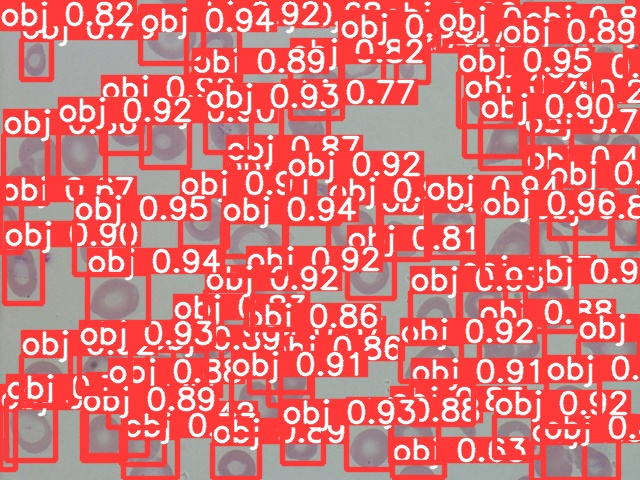

We can also export found object as YOLO anotation in .txt files.

In [17]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 320 --conf 0.35 --source /content/selection --save-txt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/selection, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-353-g2e10909 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/31 /content/selection/676.jpg: 256x320 82 objs, Done. (0.011s)
image 2/31 /content/selection/677.jpg: 256x320 80 objs, Done. (0.008s)
image 3/31 /content/selection/678.jpg: 256x320 81 objs, Done. (0.008s)
image 4/31 /content/selection/679.jpg: 256x320 89 objs, Done. (0.009s)
image 5/31 /content/selection/680.jpg: 256x320 94 objs, Done. 

It is possible to zip up whole export and download it.

In [18]:
import shutil
shutil.make_archive('output1', 'zip', '/content/yolov5/runs/detect/exp2')

'/content/yolov5/output1.zip'

# Visualize

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.

`train_batch0.jpg` shows train batch 0 mosaics and labels


`test_batch0_labels.jpg` shows val batch 0 labels

 
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to CSV as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```


train_batch0_labels.jpg

 
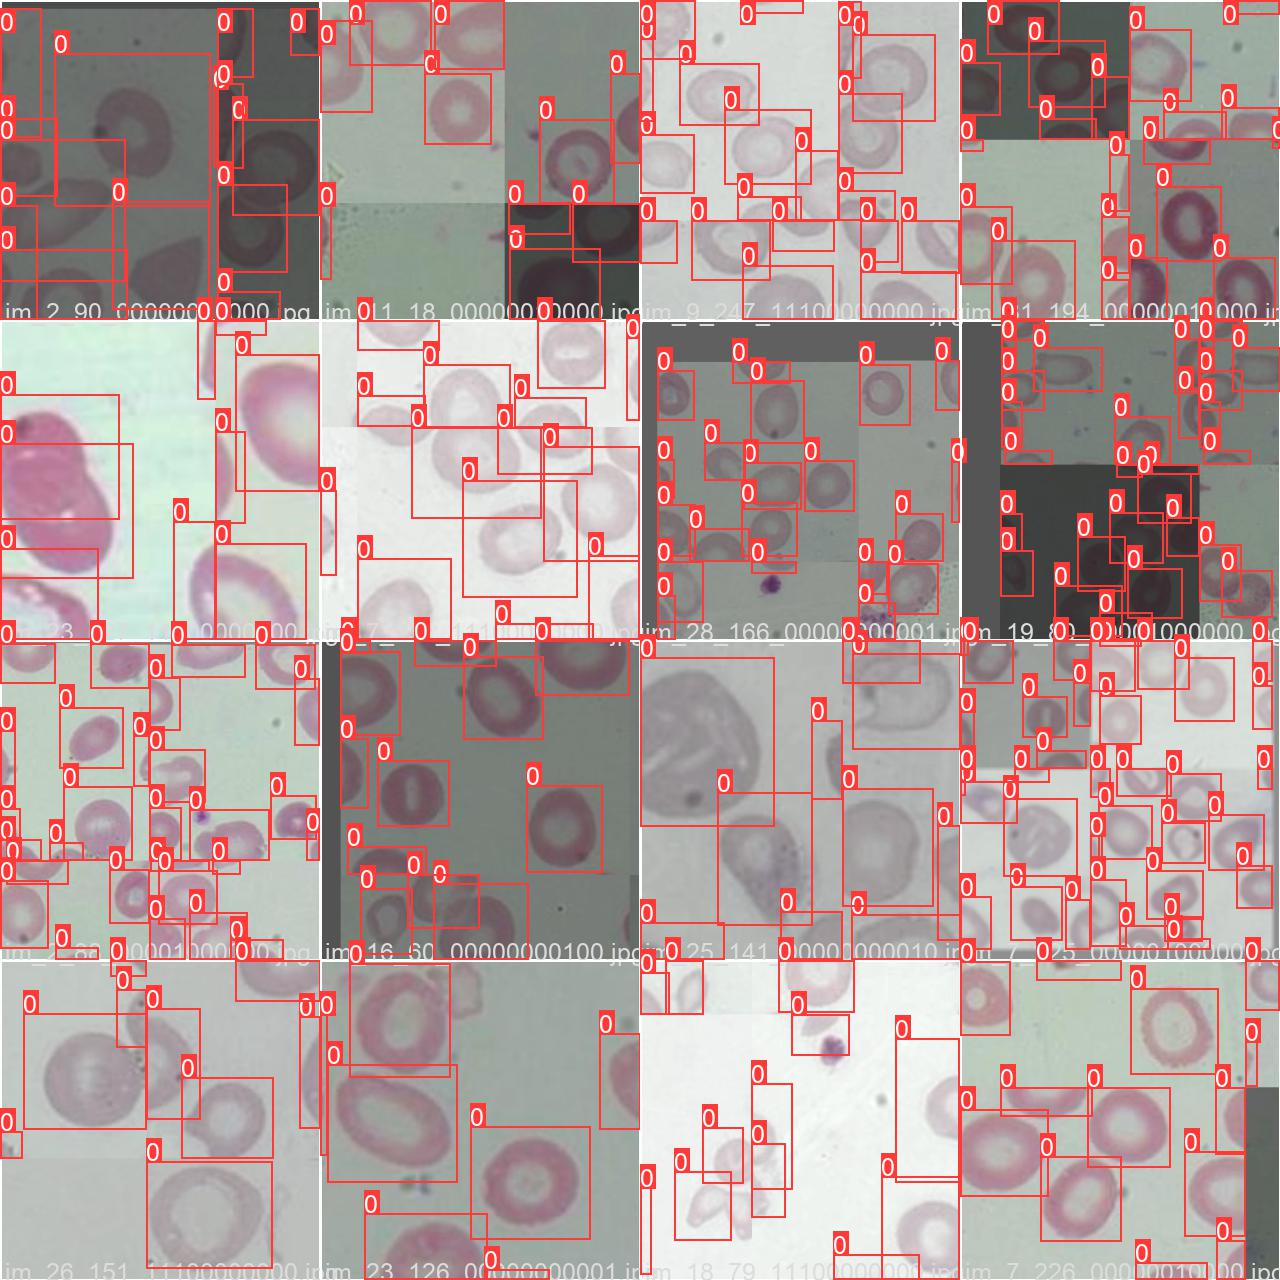

val_batch0_labels

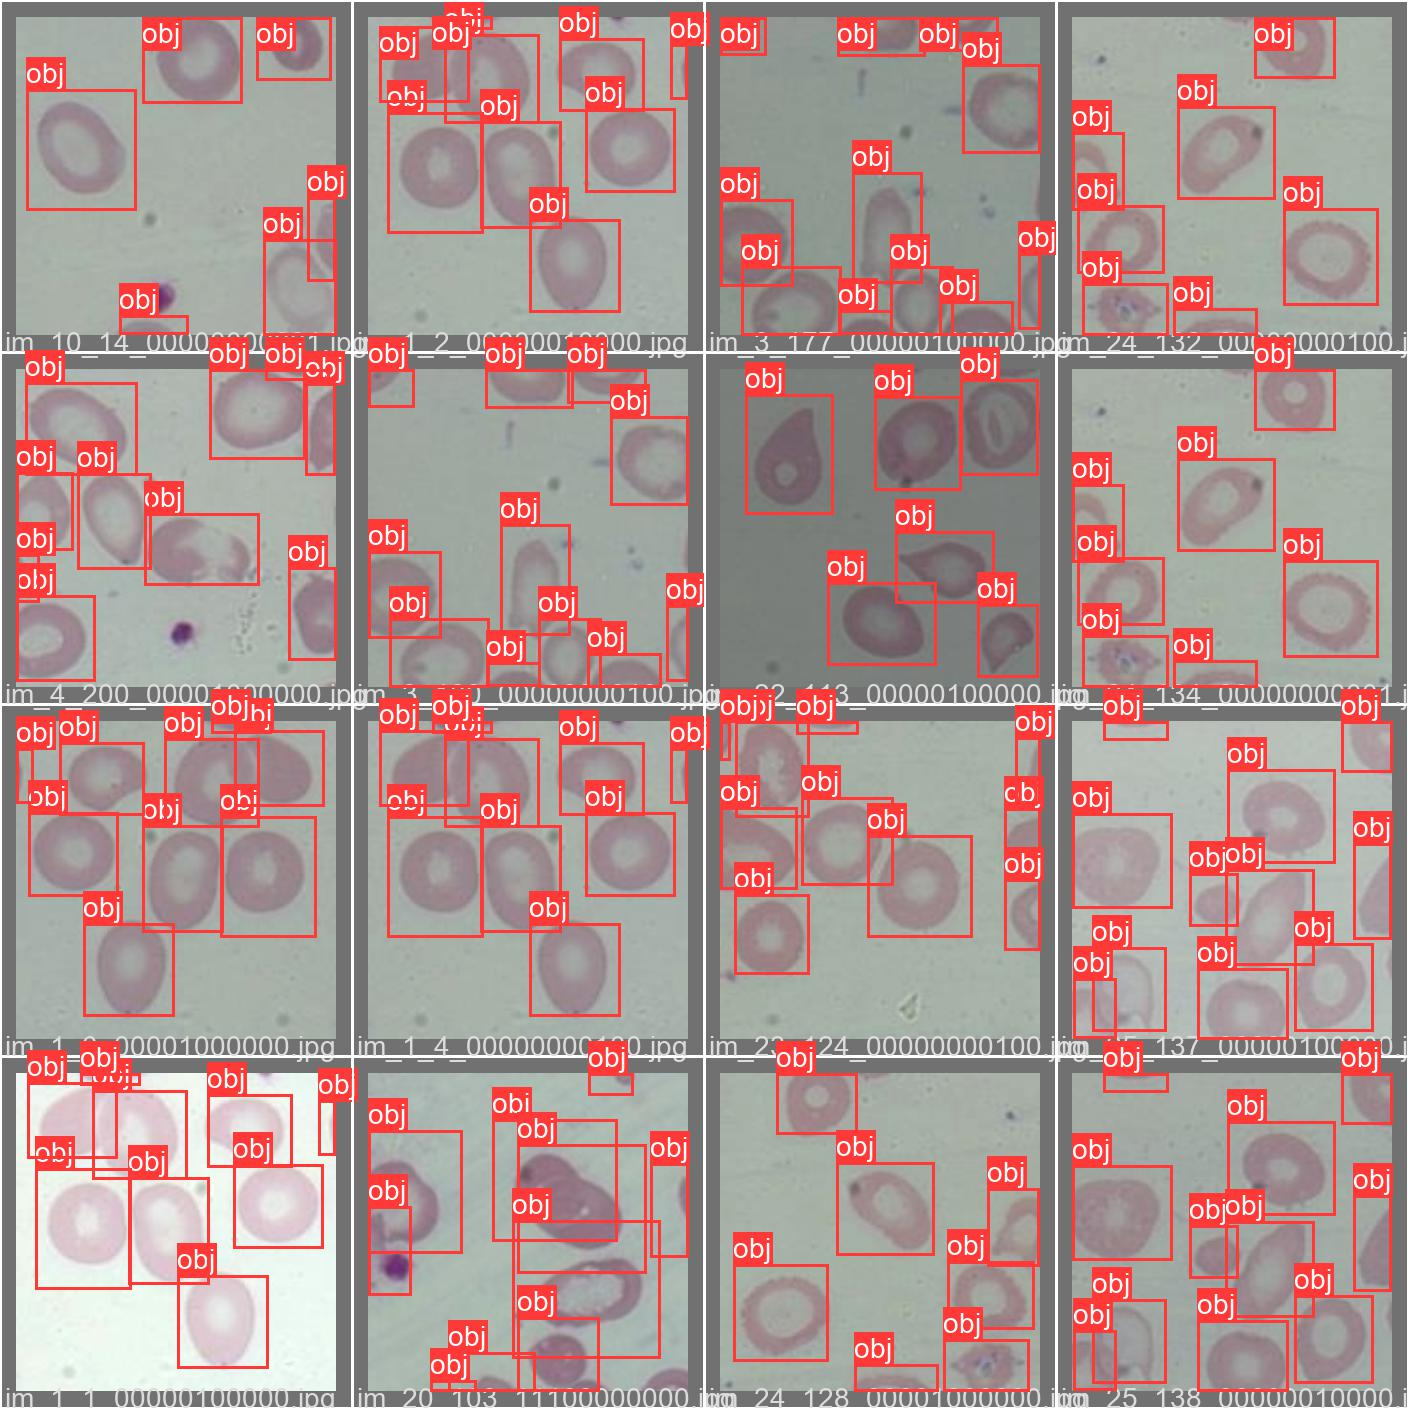

confusion matrix

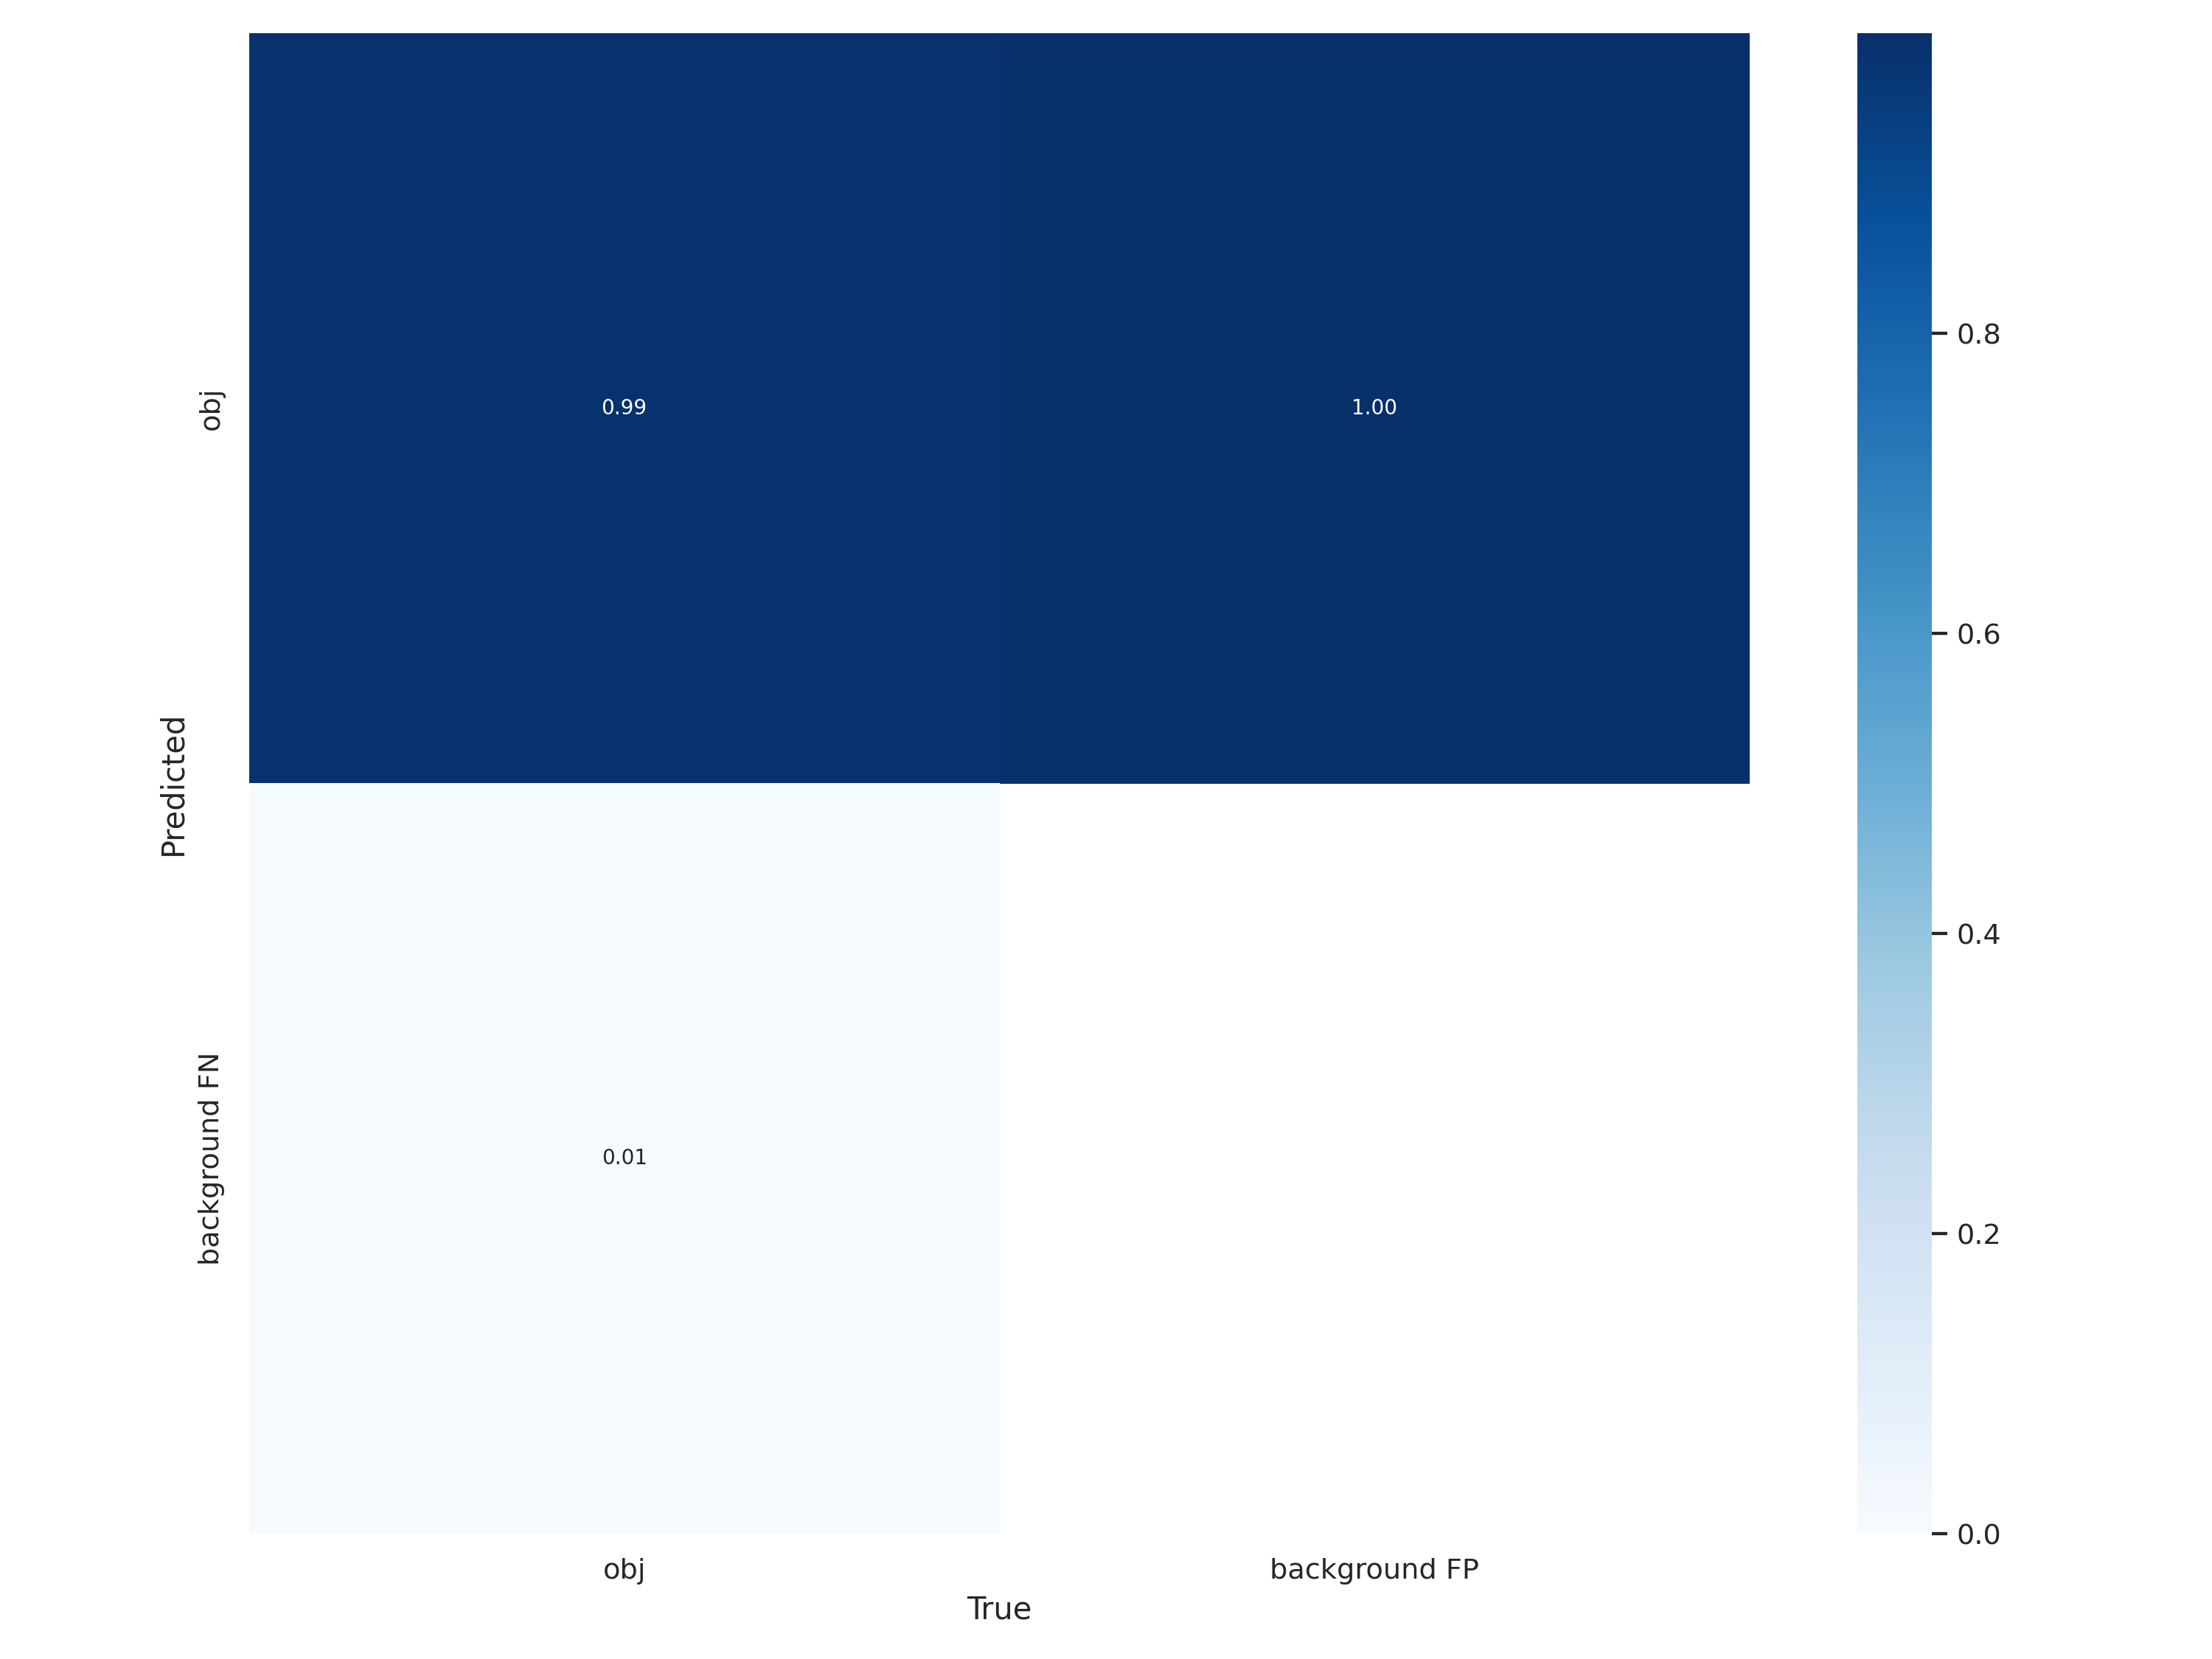

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


In [ ]:
!pip install watermark

%load_ext watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%watermark -v -p albumentations,opencv-python-headless,imgaug,cv2,yolov5,torch

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

albumentations        : 1.2.1
opencv-python-headless: not installed
imgaug                : 0.4.0
cv2                   : 4.1.2
yolov5                : unknown
torch                 : 1.12.0+cu113

